In [1]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import load_img, img_to_array
# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
# Random state.
RS = 20181026

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib import animation
from matplotlib.pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
# rcParams['figure.figsize'] = 8, 8
# rcParams['xtick.color'] = 'w'
# rcParams['ytick.color'] = 'w'
# rcParams['axes.labelcolor'] = 'w'
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
import cv2
import glob
import collections

Using TensorFlow backend.


In [2]:
# categorie =['anothers','ours']
# categorie =['abnormal','normal']
categorie =['black','broken','fungus','insect','normal']
# categorie =['anothersAbnormal', 'anothersNormal', 'oursNormal', 'anothers', 'oursAbnormal', 'ours']
image_size_shape=(224, 224)

def load_data(path):
    x_train = []
    y_train = []
    tlabel=''
    images = glob.glob(path+"/**/*")
    
    for i,photo in enumerate(images):
#         img = load_img(photo, target_size=image_size_shape)
#         tr_x = img_to_array(img)
#         tr_x=tr_x[:,:,::-1]
        tr_x = cv2.imread(photo)
        tr_x=tr_x[:,:,::-1]
        tr_x = cv2.resize(tr_x, image_size_shape)
        label = (photo.split("/"))[2]
        label_place = categorie.index(label)
#         if label != tlabel:
#             tlabel=label
#             print(label)
        x_train.append(tr_x)
        y_train.append(label_place)
        
    return np.array(x_train), y_train

trainImages, y_Lable = load_data('datasets/train1_4')

(6706, 224, 224, 3)
(6706,)


(6706, 50176)

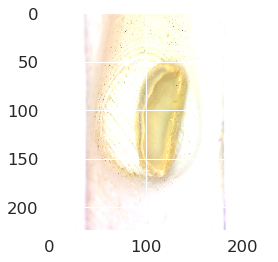

In [3]:
num_class = 2
n_components = 3
print(trainImages.shape)
plt.imshow(trainImages[0], cmap='gray')
test=trainImages[:,:,:,0].reshape(-1,224*224)
print(np.array(y_Lable).shape)
test.shape

In [4]:
# print(digits.data.shape)
# X = np.vstack([digits.data[digits.target==i]
#                for i in range(10)])
# print(X.shape)
# print(digits.target.shape)
# y = np.hstack([digits.target[digits.target==i]
#                for i in range(10)])
# print(y.shape)
digits_proj = TSNE(n_components=n_components, random_state=RS).fit_transform(test)
# digits_proj = StandardScaler().fit_transform(digits_proj)

In [5]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num_class))
    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num_class):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, categorie[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [6]:
if n_components == 2:
    scatter(digits_proj, np.array(y_Lable))

MovieWriter imagemagick unavailable.


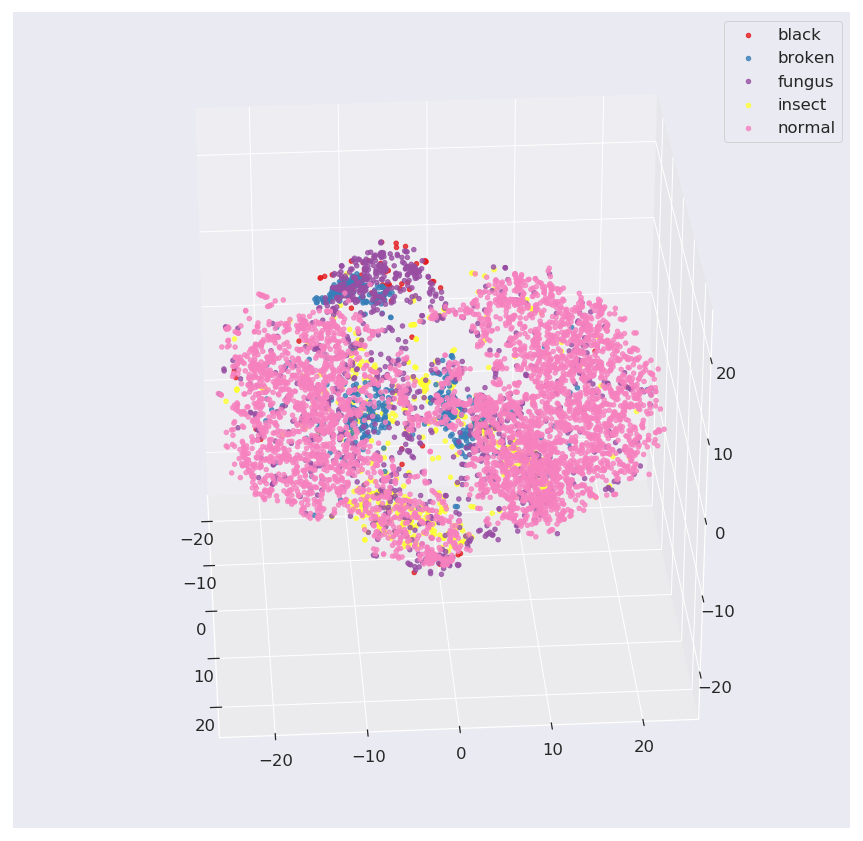

In [7]:
def show3D(X, y, isTrain=True):
    label_to_id_dict = {v:i for i,v in enumerate(np.unique(y))}
    id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111,projection='3d')

    plt.grid()

    nb_classes = len(np.unique(y))

    for label_id in np.unique(y):
        ax.scatter(X[np.where(y == label_id), 0],
                    X[np.where(y == label_id), 1],
                    X[np.where(y == label_id), 2],
                    alpha=0.8,
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    marker='o',
                    label=categorie[label_id])
    ax.legend(loc='best')
    ax.view_init(25, 45)
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.set_zlim(-25, 25)
    
    anim = animation.FuncAnimation(fig, lambda frame_number: ax.view_init(30, 4 * frame_number), interval=75, frames=90)
    plot_3d_animation_filename = ''
    if isTrain:
        plot_3d_animation_filename = 'animation_train.gif'
    else: 
        plot_3d_animation_filename = 'animation_test.gif'
    anim.save(plot_3d_animation_filename, writer='imagemagick')
    
if n_components == 3:
    show3D(digits_proj, y_Lable, isTrain=True)

In [8]:
from sklearn.decomposition import PCA
print(test.shape)
pca = PCA(2)  # project to 2 dimensions
Xproj = pca.fit_transform(test)
print(test.shape)
print(Xproj.shape)

(6706, 50176)
(6706, 50176)
(6706, 2)


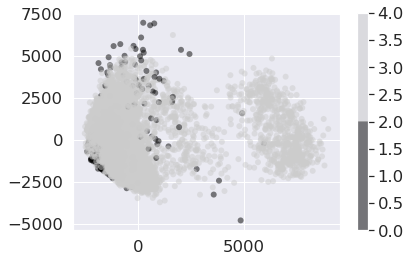

In [9]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=np.array(y_Lable), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar();

5724898.52328 [-0.0004901  -0.00038414 -0.00032003 ..., -0.00597623 -0.00699552
 -0.00840124]
3071052.63206 [ 0.00022972  0.00020362  0.0001645  ..., -0.00454602 -0.00537225
 -0.00630551]


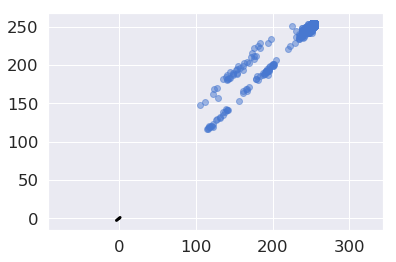

In [10]:
plt.plot(test[:, 0], test[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length, vector)
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

(1687,)


(1687, 50176)

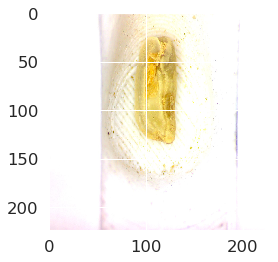

In [11]:
testImages, y_Lable = load_data('datasets/test1_4')
plt.imshow(testImages[0], cmap='gray')
test=testImages[:,:,:,0].reshape(-1,224*224)
print(np.array(y_Lable).shape)
test.shape

In [12]:
digits_proj = TSNE(n_components=n_components, random_state=RS).fit_transform(test)
if n_components == 2:
    scatter(digits_proj, np.array(y_Lable))

MovieWriter imagemagick unavailable.


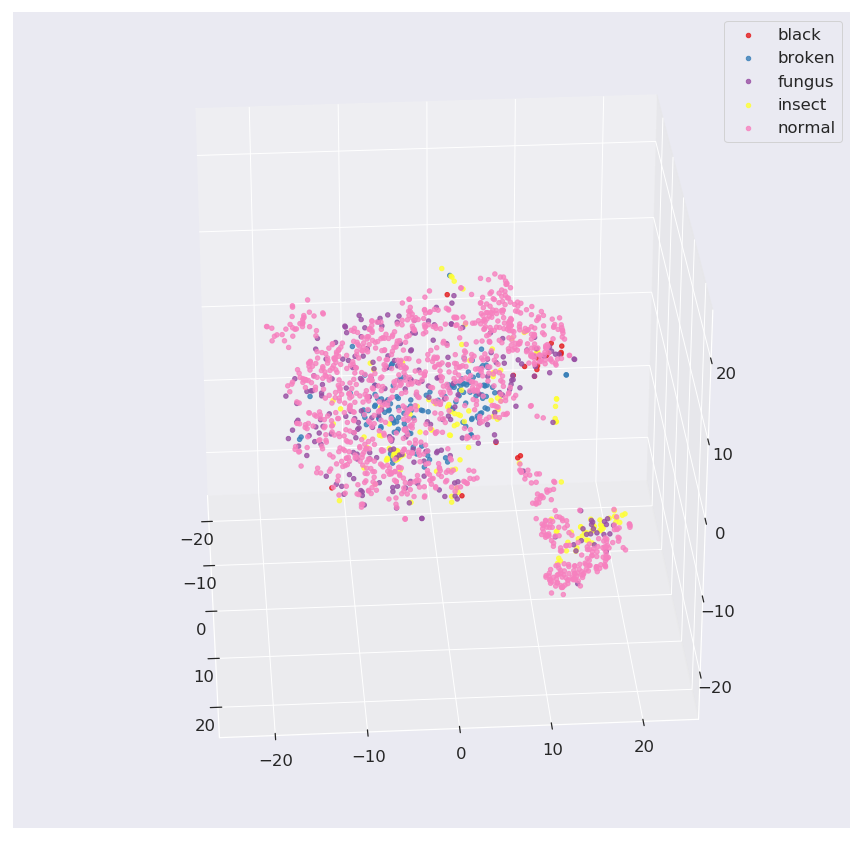

In [13]:
if n_components == 3:
    show3D(digits_proj, y_Lable, isTrain=False)

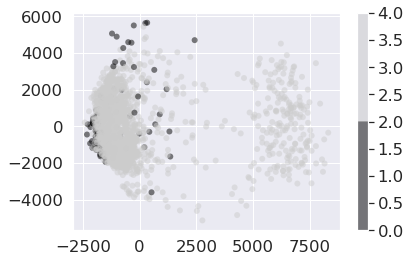

In [14]:
pca = PCA(2)  # project to 2 dimensions
Xproj = pca.fit_transform(test)
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=np.array(y_Lable), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar();

6432738.07004 [-0.00316408 -0.00268997 -0.00245517 ..., -0.01066724 -0.01272    -0.01493344]
2633560.39814 [ 0.00511887  0.00502899  0.00498355 ..., -0.00251691 -0.00343792
 -0.00422524]


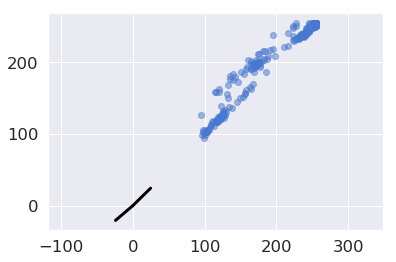

In [15]:
plt.plot(test[:, 0], test[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length, vector)
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [1]:
"""tf .meta to pb"""
# import tensorflow as tf

# meta_path = 'AIA_HsinChu1_Project_jt071_group10/log/model.ckpt-1570.meta' # Your .meta file

# with tf.Session() as sess:

#     # Restore the graph
#     saver = tf.train.import_meta_graph(meta_path)

#     # Load weights
#     saver.restore(sess,tf.train.latest_checkpoint('AIA_HsinChu1_Project_jt071_group10/log'))

#     # Output nodes
#     output_node_names =[n.name for n in tf.get_default_graph().as_graph_def().node]

#     # Freeze the graph
#     frozen_graph_def = tf.graph_util.convert_variables_to_constants(
#         sess,
#         sess.graph_def,
#         output_node_names)

#     # Save the frozen graph
#     with open('in4_graph.pb', 'wb') as f:
#       f.write(frozen_graph_def.SerializeToString())

INFO:tensorflow:Restoring parameters from AIA_HsinChu1_Project_jt071_group10/log/model.ckpt-1570


InternalError: Dst tensor is not initialized.
	 [[Node: save_1/RestoreV2/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_30_save_1/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: save_1/RestoreV2/_22 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_28_save_1/RestoreV2", _device="/job:localhost/replica:0/task:0/device:CPU:0"](save_1/RestoreV2:1207)]]